# **가설 5** : 교육과정, 입시제도의 변화와 사교육, 학업 성취도의 관계
매번 정권이 바뀌면서 우리나라의 교육과정은 잦은 풍파를 맞이한다. 

2006년 제 7차 교육과정이 개정된 이후 급변하는 교육과정에 날선 시선이 집중되었고, 정부는 이를 회피하기 위해 09개정, 15개정, 22개정 등의 연도별 개정으로 명칭만 바꾼채로 빈번한 개정을 시행했다.

논란이 되거나 큰 사건으로는 점점 줄어드는 수학 과목 시험 범위, 국어, 영어 수준별 평가(A/B형) 진행, 한국사 필수과목 및 절대평가 진행, 영어 절대평가 진행, 문이과 통합 및 수학 선택과목 다변화 등이 있다. 

입시제도 역시 논술제도의 축소, 수능 최저등급의 감소, 정시와 수시 비율의 변화 등 다양한 변화가 진행된다.

이에 따라 여러가지 가설을 세울 수 있는데, 가령 수학 범위가 줄어들었으니 수학에 대한 부담이 줄어들어 사교육비가 줄어들거나, 학업 성취도에 변화가 있을 것이다 등 따위다.

그러나 위의 가설은 틀렸다. 코로나로 인해서인지 알 수는 없으나, 최근 사교육비가 반등했다는 뉴스가 한 번 휩쓸고 갔다. 

이처럼 '교육과정과 입시제도의 변화'는 사교육비와 학업 성취도 데이터 등으로 입증되거나 반증될 수 있는데, 우리나라의 주된 교육과정 변천사를 통해 여러 가설을 세워보고 이를 증명해보고자 한다.

가설은 아래와 같다.(수정 중)

> **가설 5-1 :** 영어 절대 평가는 학생의 영어 성취도를 낮추고, 국어 수학 등 타과목 사교육비를 증대시켜 총 사교육비의 총량은 변함이 없을 것이다.

> **가설 5-2 :** 점점 범위가 줄어드는 수학 범위는 수학 성취도를 낮추고 수학 사교육비를 감소시켜 총 사교육비의 총량은 감소할 것이다.

> **가설 5-3 :** 2016년에는 무슨 일이 있었기에, 사교육 참가율은 반등하고 학업 성취도는 하락했는가?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt
from glob import glob
import folium
import json
import requests

In [2]:
file_names = sorted(glob('dataset/2011*.xlsx'))
file_names

['dataset\\2011~2020 학업성취도 평가 고등학생.xlsx',
 'dataset\\2011~2020 학업성취도 평가 중학생.xlsx']

## 2011~2020 학업 성취도 평가 EDA
**데이터 소개**
- 평가원에서 매년 발간되는 교육 평가 보고서에서 가져옴
- 중학교 3학년과 고등학교 1학년을 대상으로 매년 진행되는 학업 성취도 평가 데이터(집계자료)
- 2009~2015년은 전수조사, 2016년~2020년은 표본조사가 진행됨(2016년 1.5%, 나머진 3% 표본)
- 2021년 자료는 아직 집계되지 않음(평가원왈 연내발간예정)
- sheets : 전체, 성별, 지역별
- columns : 학력수준, 연도, 국어, 수학, 영어, 성별(성별 sheet), 지역별(지역별 sheet)
- '학력수준'의 경우 '우수학력', '보통학력', '기초학력', '기초학력 미달'로 표기되었으나 2020년부터 제4수준~제1수준으로 변경됨

In [3]:
sheets = ['전체', '성별', '지역별']
columns = ['학력수준', '연도', '국어', '수학', '영어'] # 공통 columns

### 중학교 학업 성취도 평가 EDA
**변수명**

In [82]:
tmp = pd.read_excel(file_names[1], sheet_name=sheets)
# df_middle_achievement = pd.merge(tmp[sheets[0]], tmp[sheets[1]], on=columns, how='outer')
# df_middle_achievement = pd.merge(df_middle_achievement, tmp[sheets[2]], on=columns, how='outer')
# df_middle_achievement

mid_achieve_all = tmp[sheets[0]]
mid_achieve_sex = tmp[sheets[1]]
mid_achieve_region = tmp[sheets[2]]

In [83]:
mid_achieve_all = mid_achieve_all.melt(id_vars=['학력수준', '연도'], var_name='과목', value_name='비율')
mid_achieve_all.head()

,학력수준,연도,과목,비율
0,우수학력,2011,국어,31.0
1,우수학력,2012,국어,31.1
2,우수학력,2013,국어,30.0
3,우수학력,2014,국어,26.5
4,우수학력,2015,국어,30.2


<AxesSubplot:xlabel='학력수준', ylabel='비율'>

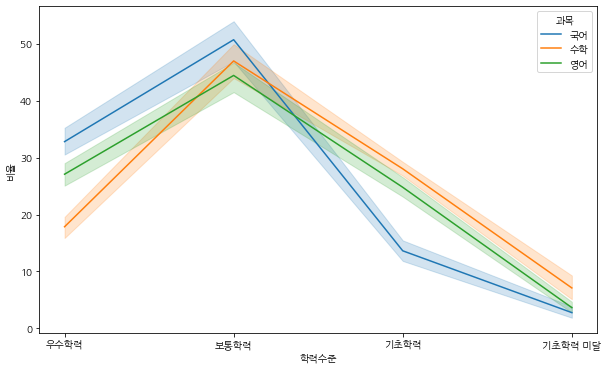

In [155]:
plt.figure(figsize=(10,6))
sns.lineplot(data=mid_achieve_all, x='학력수준', y='비율', hue="과목")

Text(0.5, 0.98, '2011~2020 중학생 과목별 학력수준')

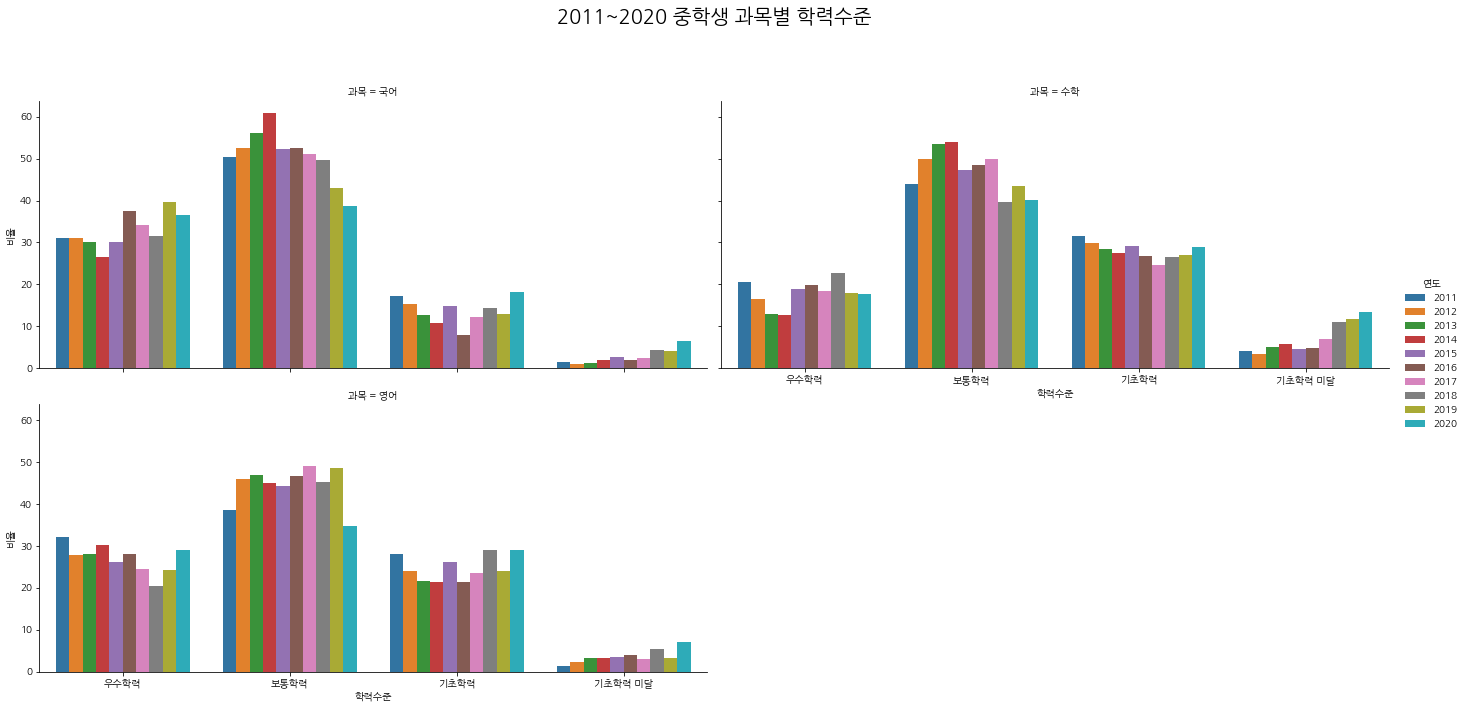

In [147]:
cat = sns.catplot(data=mid_achieve_all, x='학력수준', y='비율', hue="연도", col="과목", 
            col_wrap=2, kind="bar", ci=None, aspect=2)
# cat.set(title='10개년 연도별 학력수준')
cat.fig.subplots_adjust(top=0.85, left=0.05)
cat.fig.suptitle('2011~2020 중학생 과목별 학력수준', fontsize=20)

Text(0.5, 0.98, '2011~2020 중학생 과목별 학력수준')

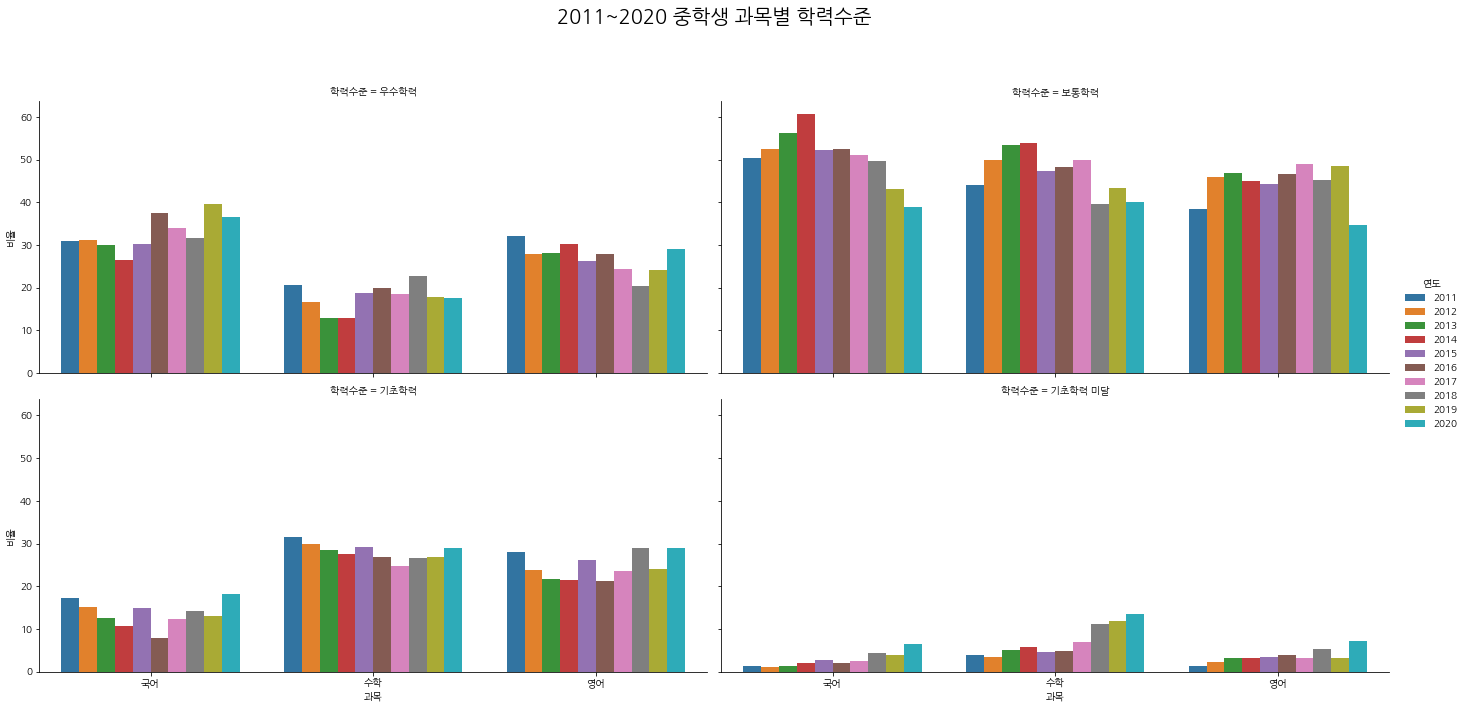

In [150]:
cat = sns.catplot(data=mid_achieve_all, x='과목', y='비율', hue="연도", col="학력수준", 
            col_wrap=2, kind="bar", ci=None, aspect=2)
cat.fig.subplots_adjust(top=0.85, left=0.05)
cat.fig.suptitle('2011~2020 중학생 과목별 학력수준', fontsize=20)

In [307]:
mid_4 = mid_achieve_all[mid_achieve_all['학력수준'] == '우수학력'].reset_index(drop=True)
mid_3 = mid_achieve_all[mid_achieve_all['학력수준'] == '보통학력'].reset_index(drop=True)
mid_43 = pd.merge(mid_4, mid_3, on=['연도', '과목'])
mid_43['보통이상'] = mid_43['비율_x'] + mid_43['비율_y']
mid_43 = mid_43[['연도', '과목', '보통이상']].reset_index(drop=True)

mid_2 = mid_achieve_all[mid_achieve_all['학력수준'] == '기초학력'].reset_index(drop=True)
mid_1 = mid_achieve_all[mid_achieve_all['학력수준'] == '기초학력 미달'].reset_index(drop=True)
mid_21 = pd.merge(mid_2, mid_1, on=['연도', '과목'])
mid_21['기초이하'] = mid_21['비율_x'] + mid_21['비율_y']
mid_21 = mid_21[['연도', '과목', '기초이하']]

mid_grade = pd.merge(mid_43, mid_21, on=['연도', '과목'])
mid_grade.head()

,연도,과목,보통이상,기초이하
0,2011,국어,81.3,18.6
1,2012,국어,83.6,16.2
2,2013,국어,86.2,13.8
3,2014,국어,87.3,12.7
4,2015,국어,82.5,17.4


In [308]:
mid_grade['우수학력'] = mid_4['비율'] 
mid_grade['보통학력'] = mid_3['비율'] 
mid_grade['기초학력'] = mid_2['비율'] 
mid_grade['기초학력 미달'] = mid_1['비율']
mid_grade.head()

,연도,과목,보통이상,기초이하,우수학력,보통학력,기초학력,기초학력 미달
0,2011,국어,81.3,18.6,31.0,50.3,17.2,1.4
1,2012,국어,83.6,16.2,31.1,52.5,15.2,1.0
2,2013,국어,86.2,13.8,30.0,56.2,12.6,1.2
3,2014,국어,87.3,12.7,26.5,60.8,10.7,2.0
4,2015,국어,82.5,17.4,30.2,52.3,14.8,2.6


Text(0.5, 1.0, '2011~2020 중학생 학업성취도(기초이하)')

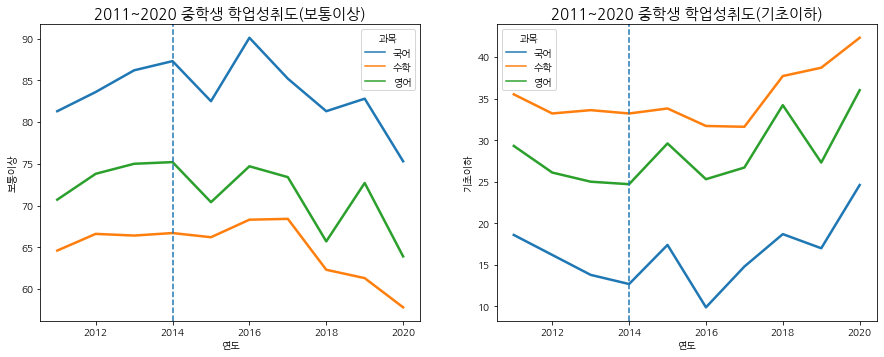

In [309]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.lineplot(data=mid_grade, x='연도', y='보통이상', hue='과목',
             palette="tab10", linewidth=2.5)
plt.axvline(x=2014, linestyle='--')
plt.title('2011~2020 중학생 학업성취도(보통이상)', fontsize=15)

plt.subplot(222)
sns.lineplot(data=mid_grade, x='연도', y='기초이하', hue='과목',
             palette="tab10", linewidth=2.5)
plt.axvline(x=2014, linestyle='--')
plt.title('2011~2020 중학생 학업성취도(기초이하)', fontsize=15)

In [310]:
mid_grade.to_csv('dataset_eda/중학생 학업성취도(학력수준별).csv', index=False)
mid_achieve_all.to_csv('dataset_eda/중학생 학업성취도(melt).csv', index=False)

### 고등학교 학업 성취도 평가 EDA

In [156]:
tmp = pd.read_excel(file_names[0], sheet_name=sheets)

high_achieve_all = tmp[sheets[0]]
high_achieve_sex = tmp[sheets[1]]
high_achieve_region = tmp[sheets[2]]

In [157]:
high_achieve_all = high_achieve_all.melt(id_vars=['학력수준', '연도'], var_name='과목', value_name='비율')
high_achieve_all.head()

,학력수준,연도,과목,비율
0,우수학력,2011,국어,33.0
1,우수학력,2012,국어,29.6
2,우수학력,2013,국어,31.1
3,우수학력,2014,국어,33.7
4,우수학력,2015,국어,28.3


<AxesSubplot:xlabel='학력수준', ylabel='비율'>

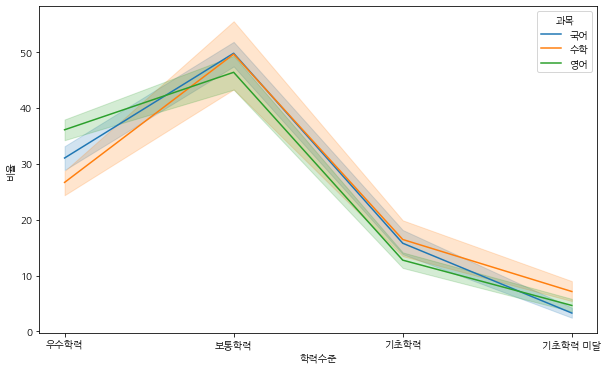

In [158]:
plt.figure(figsize=(10,6))
sns.lineplot(data=high_achieve_all, x='학력수준', y='비율', hue="과목")

In [301]:
high_4 = high_achieve_all[high_achieve_all['학력수준'] == '우수학력'].reset_index(drop=True)
high_3 = high_achieve_all[high_achieve_all['학력수준'] == '보통학력'].reset_index(drop=True)
high_43 = pd.merge(high_4, high_3, on=['연도', '과목'])
high_43['보통이상'] = high_43['비율_x'] + high_43['비율_y']
high_43 = high_43[['연도', '과목', '보통이상']].reset_index(drop=True)

high_2 = high_achieve_all[high_achieve_all['학력수준'] == '기초학력'].reset_index(drop=True)
high_1 = high_achieve_all[high_achieve_all['학력수준'] == '기초학력 미달'].reset_index(drop=True)
high_21 = pd.merge(high_2, high_1, on=['연도', '과목'])
high_21['기초이하'] = high_21['비율_x'] + high_21['비율_y']
high_21 = high_21[['연도', '과목', '기초이하']]

high_grade = pd.merge(high_43, high_21, on=['연도', '과목'])
high_grade.head()

,연도,과목,보통이상,기초이하
0,2011,국어,85.1,14.9
1,2012,국어,83.5,16.5
2,2013,국어,83.8,16.3
3,2014,국어,86.5,13.5
4,2015,국어,81.2,18.8


In [302]:
high_grade['우수학력'] = high_4['비율'] 
high_grade['보통학력'] = high_3['비율'] 
high_grade['기초학력'] = high_2['비율'] 
high_grade['기초학력 미달'] = high_1['비율']
high_grade.head()

,연도,과목,보통이상,기초이하,우수학력,보통학력,기초학력,기초학력 미달
0,2011,국어,85.1,14.9,33.0,52.1,12.9,2.0
1,2012,국어,83.5,16.5,29.6,53.9,14.4,2.1
2,2013,국어,83.8,16.3,31.1,52.7,13.5,2.8
3,2014,국어,86.5,13.5,33.7,52.8,12.2,1.3
4,2015,국어,81.2,18.8,28.3,52.9,16.2,2.6


Text(0.5, 1.0, '2011~2020 고등학생 학업성취도(기초이하)')

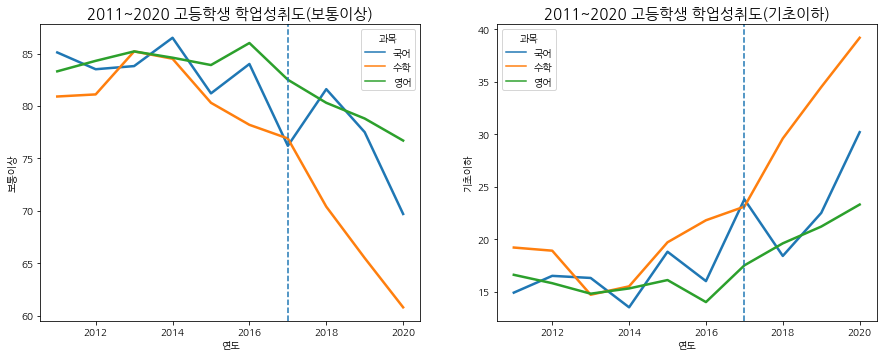

In [303]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.lineplot(data=high_grade, x='연도', y='보통이상', hue='과목',
             palette="tab10", linewidth=2.5)
plt.axvline(x=2017, linestyle='--')
plt.title('2011~2020 고등학생 학업성취도(보통이상)', fontsize=15)


plt.subplot(222)
sns.lineplot(data=high_grade, x='연도', y='기초이하', hue='과목',
             palette="tab10", linewidth=2.5)
plt.axvline(x=2017, linestyle='--')
plt.title('2011~2020 고등학생 학업성취도(기초이하)', fontsize=15)



In [306]:
high_grade.to_csv('dataset_eda/고등학생 학업성취도(학력수준별).csv', index=False)
high_achieve_all.to_csv('dataset_eda/고등학생 학업성취도(melt).csv', index=False)

## 2011 ~ 2020 사교육 EDA

### 지역별 1인당 월평균 사교육비

In [249]:
region_mean = pd.read_csv('dataset/지역별_학생_1인당_월평균_사교육비_20221019130726.csv', 
                          encoding='cp949')
region_mean.head()

,항목,과목 및 유형,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,서 울 (만원),사교육비,32.8,31.2,32.8,33.5,33.8,35.2,39.1,41.1,45.1,45.3,52.9
1,서 울 (만원),국 어,2.7,2.4,2.3,2.3,2.3,2.5,3.0,3.2,3.5,4.1,4.8
2,서 울 (만원),영 어,10.8,10.1,11.3,11.2,11.2,10.7,11.1,12.0,13.0,13.7,15.7
3,서 울 (만원),수 학,9.6,10.4,10.4,10.8,10.6,10.8,11.7,11.9,12.6,14.1,15.5
4,서 울 (만원),"사회, 과학",1.7,1.7,1.1,1.2,1.3,1.6,1.8,1.8,2.1,2.5,2.7


In [250]:
region_mean['과목 및 유형'] = region_mean['과목 및 유형'].map(lambda x : x.replace(' ',''))
region_mean['과목 및 유형'].unique()

array(['사교육비', '국어', '영어', '수학', '사회,과학', '논술', '컴퓨터', '제2외국어,한문등', '음악',
       '미술', '체육', '취미·교양'], dtype=object)

In [251]:
region_mean = region_mean.melt(id_vars=['항목', '과목 및 유형'], var_name='연도', value_name='월평균')
region_mean

,항목,과목 및 유형,연도,월평균
0,서 울 (만원),사교육비,2011,32.8
1,서 울 (만원),국어,2011,2.7
2,서 울 (만원),영어,2011,10.8
3,서 울 (만원),수학,2011,9.6
4,서 울 (만원),"사회,과학",2011,1.7
...,...,...,...,...
523,읍면지역 (만원),"제2외국어,한문등",2021,0.3
524,읍면지역 (만원),음악,2021,2.0
525,읍면지역 (만원),미술,2021,1.0
526,읍면지역 (만원),체육,2021,2.8


In [254]:
region_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   항목       528 non-null    object 
 1   과목 및 유형  528 non-null    object 
 2   연도       528 non-null    int32  
 3   월평균      528 non-null    float64
dtypes: float64(1), int32(1), object(2)
memory usage: 14.6+ KB


In [347]:
region_mean['연도'] = region_mean['연도'].astype(int)
region_mean['월평균'] = region_mean['월평균'].astype(str).map(lambda x : x.replace('-', '0')).astype(float)

In [257]:
region_major_mean = region_mean[(region_mean['과목 및 유형']=='국어')
                                | (region_mean['과목 및 유형']=='수학')
                                | (region_mean['과목 및 유형']=='영어')].reset_index(drop=True)

Text(0.5, 1.0, '2011~2020 지역별 월평균 국영수 사교육비')

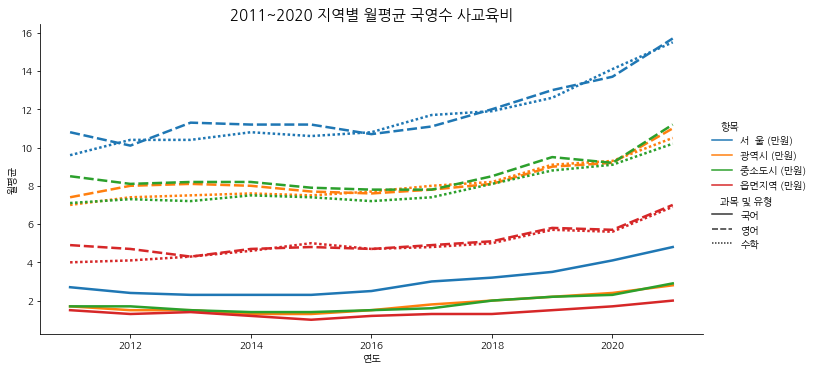

In [314]:

sns.relplot(data=region_major_mean, x='연도', y='월평균',
            hue='항목', style="과목 및 유형", kind="line", linewidth=2.5, aspect=2)
plt.title('2011~2020 지역별 월평균 국영수 사교육비', fontsize=15)


Text(0.5, 1.0, '2011~2020 지역별 월평균 영어 사교육비')

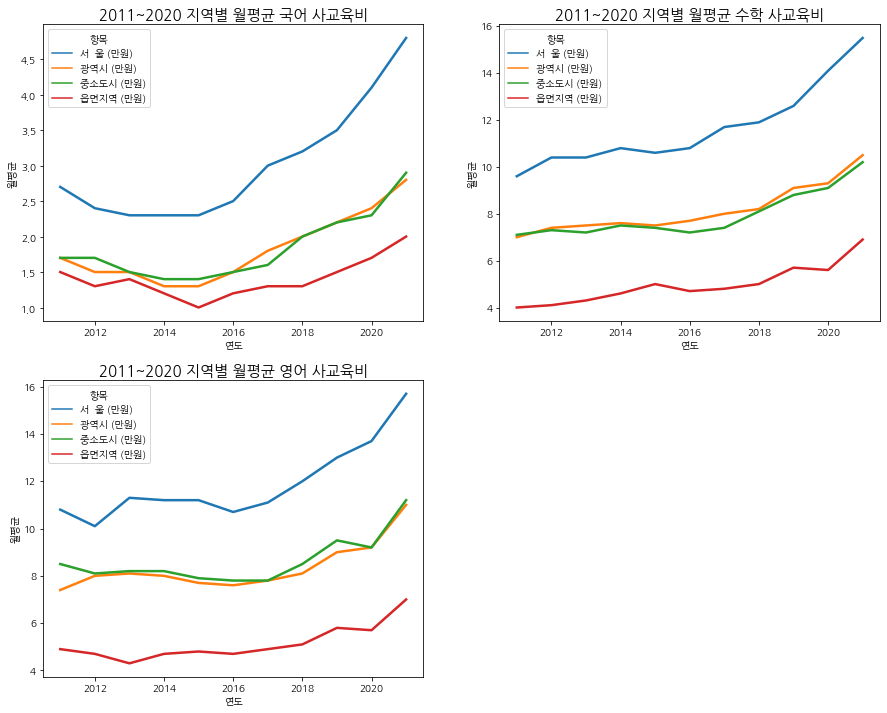

In [315]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.lineplot(data=region_major_mean[region_major_mean['과목 및 유형']=='국어'], x='연도', y='월평균',
            hue='항목', linewidth=2.5)
plt.title('2011~2020 지역별 월평균 국어 사교육비', fontsize=15)


plt.subplot(222)
sns.lineplot(data=region_major_mean[region_major_mean['과목 및 유형']=='수학'], x='연도', y='월평균',
            hue='항목', linewidth=2.5)
plt.title('2011~2020 지역별 월평균 수학 사교육비', fontsize=15)


plt.subplot(223)
sns.lineplot(data=region_major_mean[region_major_mean['과목 및 유형']=='영어'], x='연도', y='월평균',
            hue='항목', linewidth=2.5)
plt.title('2011~2020 지역별 월평균 영어 사교육비', fontsize=15)


### 전국, 서울 과목별 사교육 참여율

In [346]:
df_ratio = pd.read_csv('dataset/지역_및_과목별_사교육_참여율_20221019141852.csv',
                       encoding='cp949')
df_ratio['과목 및 유형'] = df_ratio ['과목 및 유형'].map(lambda x : x.replace(' ',''))
df_ratio['항목'] = df_ratio['항목'].map(lambda x : x.replace(' ','').replace('(%)',''))
df_ratio = pd.melt(df_ratio, id_vars=['항목','과목 및 유형'], var_name = '시점', value_name = '참여율').set_axis(['기준','과목','연도','참여율'],axis='columns')
df_ratio['연도'] = df_ratio['연도'].astype(int)
df_ratio['참여율'] = df_ratio['참여율'].astype(str).map(lambda x : x.replace('-', '0')).astype(float)
df_ratio.head()

,기준,과목,연도,참여율
0,평균,사교육참여,2011,71.7
1,평균,국어,2011,26.2
2,평균,영어,2011,49.2
3,평균,수학,2011,50.2
4,평균,"사회,과학",2011,17.0


In [348]:
major_ratio = df_ratio[(df_ratio['과목']=='국어') 
                       | (df_ratio['과목']=='수학')
                       | (df_ratio['과목']=='영어') ].reset_index(drop=True)

major_ratio.shape

(66, 4)

Text(0.5, 1.0, '2011~2020 전국, 서울 국영수 사교육 참여율')

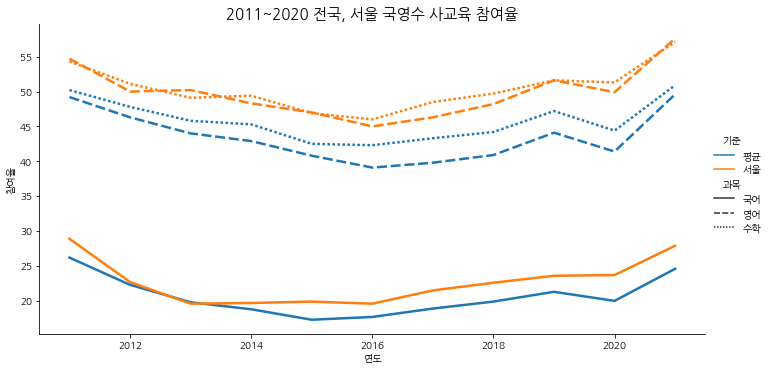

In [350]:
sns.relplot(data=major_ratio, x='연도', y='참여율',
            hue='기준', style="과목", kind="line", linewidth=2.5, aspect=2)
plt.title('2011~2020 전국, 서울 국영수 사교육 참여율', fontsize=15)

Text(0.5, 1.0, '2011~2020 전국, 서울 영어 사교육 참여율')

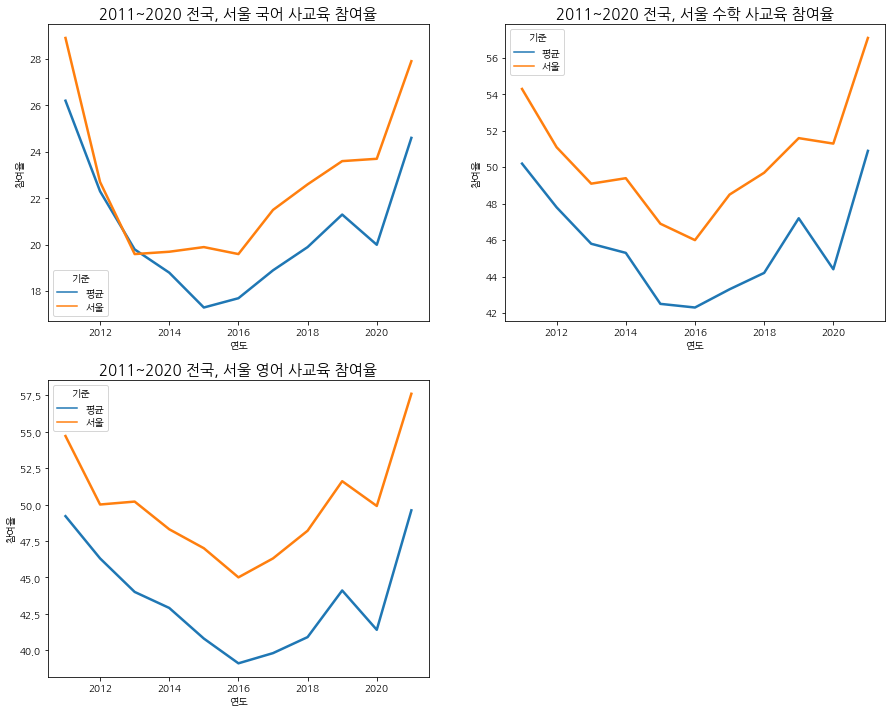

In [352]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.lineplot(data=major_ratio[major_ratio['과목']=='국어'], x='연도', y='참여율',
            hue='기준', linewidth=2.5)
plt.title('2011~2020 전국, 서울 국어 사교육 참여율', fontsize=15)

plt.subplot(222)
sns.lineplot(data=major_ratio[major_ratio['과목']=='수학'], x='연도', y='참여율',
            hue='기준', linewidth=2.5)
plt.title('2011~2020 전국, 서울 수학 사교육 참여율', fontsize=15)

plt.subplot(223)
sns.lineplot(data=major_ratio[major_ratio['과목']=='영어'], x='연도', y='참여율',
            hue='기준', linewidth=2.5)
plt.title('2011~2020 전국, 서울 영어 사교육 참여율', fontsize=15)